In [1]:
from keras import models
from keras.layers import Dense, Dropout
# from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import coremltools as ct

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [30]:
model = models.Sequential()
# del model

In [31]:
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(140, activation='sigmoid'))

In [32]:
dataframe = pd.read_csv("../autoEncodersIntro/fullDataset.csv")
dataframe = dataframe.drop(columns=['Unnamed: 0'])
raw_data = dataframe.values
dataframe.head()
print(len(dataframe))

128790


In [33]:
full_length = len(raw_data)
separation_full = np.arange((full_length))
separation_full_list = separation_full.tolist()
separation_train = random.sample(separation_full_list, int(0.8 * full_length))
test = dataframe
train = dataframe.iloc[separation_train,:]
# test = dataframe.drop(dataframe.loc[separation_train,].index, inplace=True)
# print(len(test))
test.drop(dataframe.loc[separation_train,].index, inplace=True)
print(len(test))
print(len(train))


25758
103032


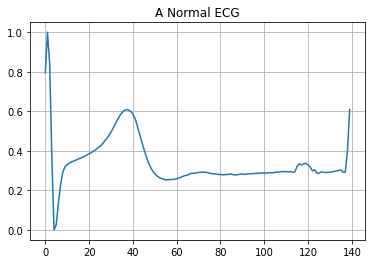

In [34]:
plt.grid()
plt.plot(np.arange(140), raw_data[0,:])
plt.title("A Normal ECG")
plt.show()

In [35]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [36]:
model.compile(optimizer='adam', loss='mae')

In [37]:
# Train the model
history = model.fit(train, train, 
          epochs=20, 
          batch_size=512,
          validation_data=(test, test),
          shuffle=True)

Epoch 1/20
202/202 [==============================] - 2s 4ms/step - loss: 0.1651 - val_loss: 0.0443
Epoch 2/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0425 - val_loss: 0.0378
Epoch 3/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0365 - val_loss: 0.0309
Epoch 4/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0286 - val_loss: 0.0261
Epoch 5/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0257 - val_loss: 0.0250
Epoch 6/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0247 - val_loss: 0.0241
Epoch 7/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0239 - val_loss: 0.0239
Epoch 8/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0234 - val_loss: 0.0228
Epoch 9/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0227 - val_loss: 0.0223
Epoch 10/20
202/202 [==============================] - 1s 3ms/step - loss: 0.0224 - val_loss: 0.0221

In [45]:
reconstructions = model.predict(raw_data)

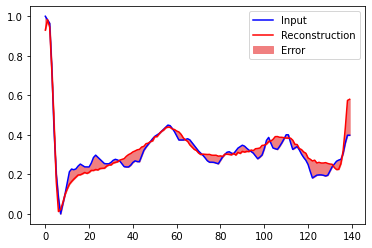

In [46]:
index = 15200
plt.plot(raw_data[index], 'b')
plt.plot(reconstructions[index], 'r')
plt.fill_between(np.arange(140), reconstructions[index], raw_data[index], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [42]:
model.save("./test.h5")

In [44]:
model2 = models.load_model("./test.h5")

In [48]:
coremltools.converters.keras.convert(model2)

TypeError: 'InputLayer' object is not iterable